## Exploratory Data Analysis

In [1]:
#import libraries
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold


In [2]:
#import the dataset
#Dataset information about Outcome: "To express the final result 1 is Yes and 0 is No"
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#information about the shape of the dataset 
print("We have",df.shape[0],"rows and ", df.shape[1], "columns in our dataset.")
print("The titles of the columns are:", [col for col in df.columns])

We have 768 rows and  9 columns in our dataset.
The titles of the columns are: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [4]:
#information about dataset - df.info():is a way to check for missing values and see the data types in our dataset
print(df.info())
print("We can see that there isn't any missing value, but we're also going to use another function to ensure this fact.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
We can see that there isn't any missing value, but we're also going to use another function to ensure this fact.


## Data Preprocessing

In [5]:
#df.isnull().sum() is a function to count the number of missing values in each column
print(df.isnull().any())
print("We can see that we don't have any missing value.")

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool
We can see that we don't have any missing value.


In [6]:
#identifying duplicate record in the dataset
has_duplicates = df.duplicated().any()
if has_duplicates:
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [7]:
#a little more explanation 
print("If we have duplicates, because we don't have any unique usernames or any \"primary keys,\", we couldn't know, if")
print("someone wrote something twice, or if we have two different users with the same results.")
print("In our dataset, we are totally fine, because we don't have any duplicates in the first place.")

If we have duplicates, because we don't have any unique usernames or any "primary keys,", we couldn't know, if
someone wrote something twice, or if we have two different users with the same results.
In our dataset, we are totally fine, because we don't have any duplicates in the first place.


In [8]:
#statistical information about the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
#statistical information for people with or without diabetes separately
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
#comments
print("We can observe that the mean values of pregnancies, glucose, insulin, BMI, and age differ significantly between")
print("individuals with and without diabetes. Additionally, the mean values of BloodPressure, SkinThickness, and")
print("DiabetesPedigreeFunction between individuals with and without diabetes are slightly higher, but there's not a")
print("significant difference between them.")
print("Whose information will be important to our machine learning model, it will function as insights for it.")

We can observe that the mean values of pregnancies, glucose, insulin, BMI, and age differ significantly between
individuals with and without diabetes. Additionally, the mean values of BloodPressure, SkinThickness, and
DiabetesPedigreeFunction between individuals with and without diabetes are slightly higher, but there's not a
significant difference between them.
Whose information will be important to our machine learning model, it will function as insights for it.


## Data Visualization

0    500
1    268
Name: Outcome, dtype: int64


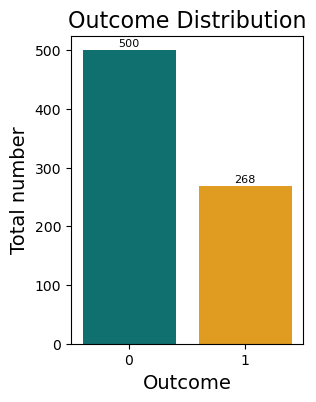

In [11]:
#Outcome Distribution -Barplot
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)

plt.figure(figsize=(3, 4))

ax = sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette=["teal", "orange"])
for i, v in enumerate(outcome_counts):
    ax.text(i, v + 4 , str(v), ha='center', va='bottom', fontsize= 8, color='black')
    
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Total number', fontsize=14)
plt.title('Outcome Distribution', fontsize=16)
plt.show()

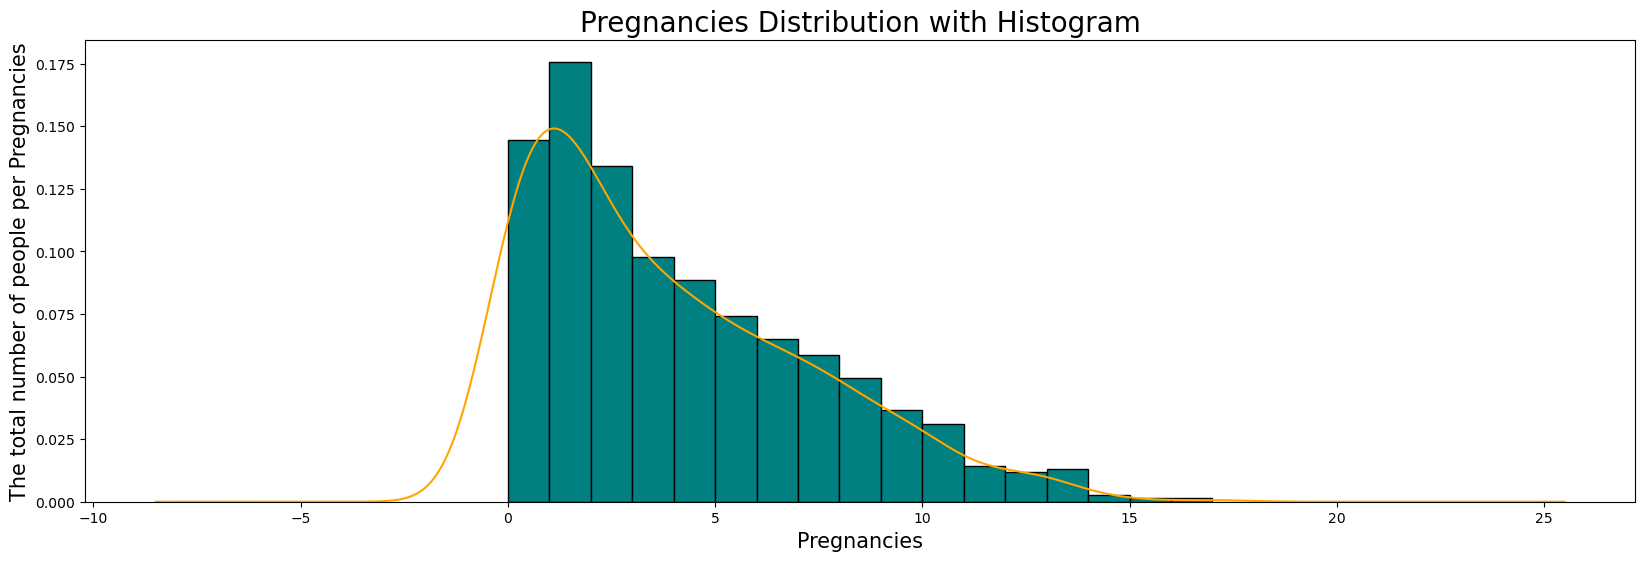

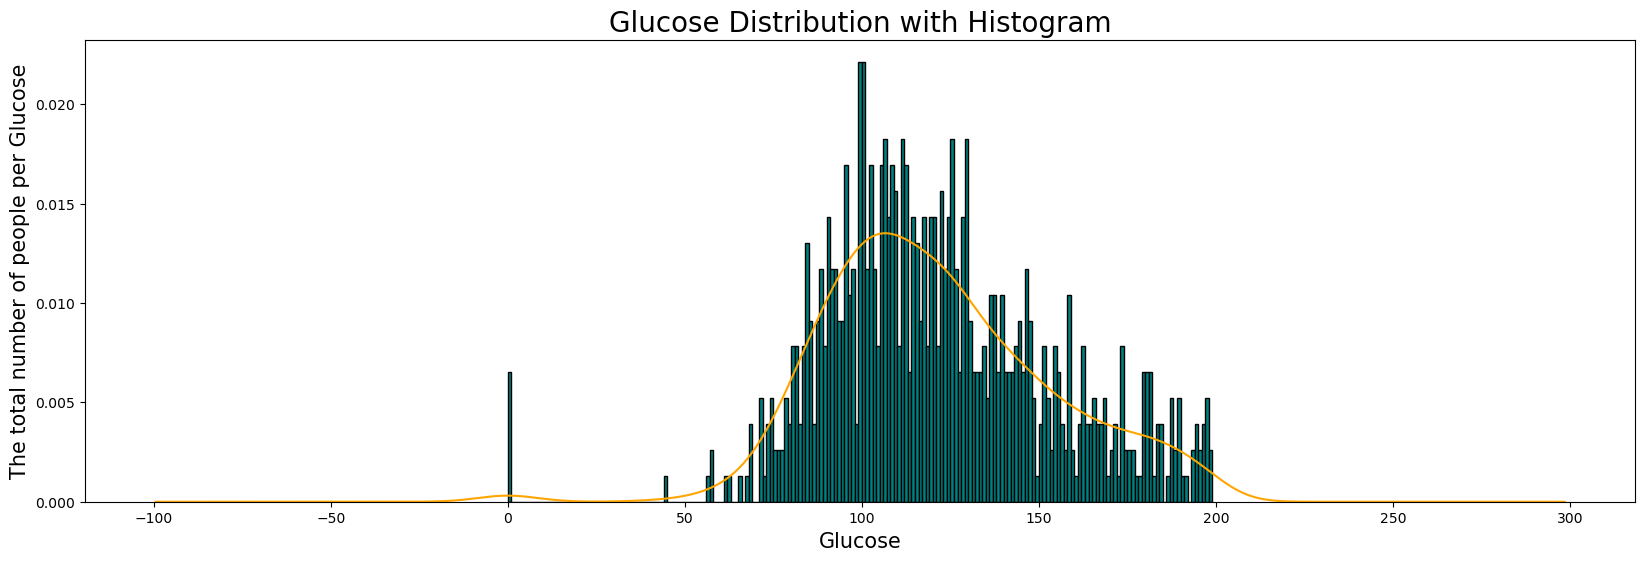

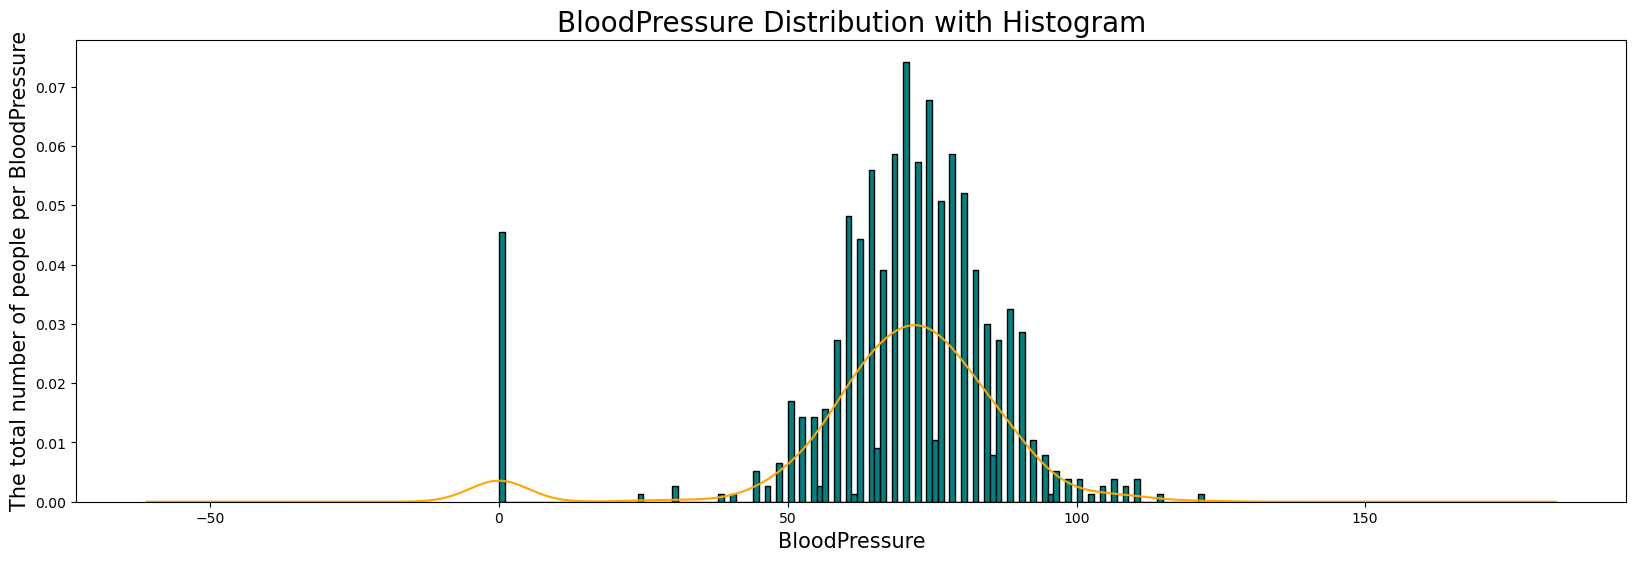

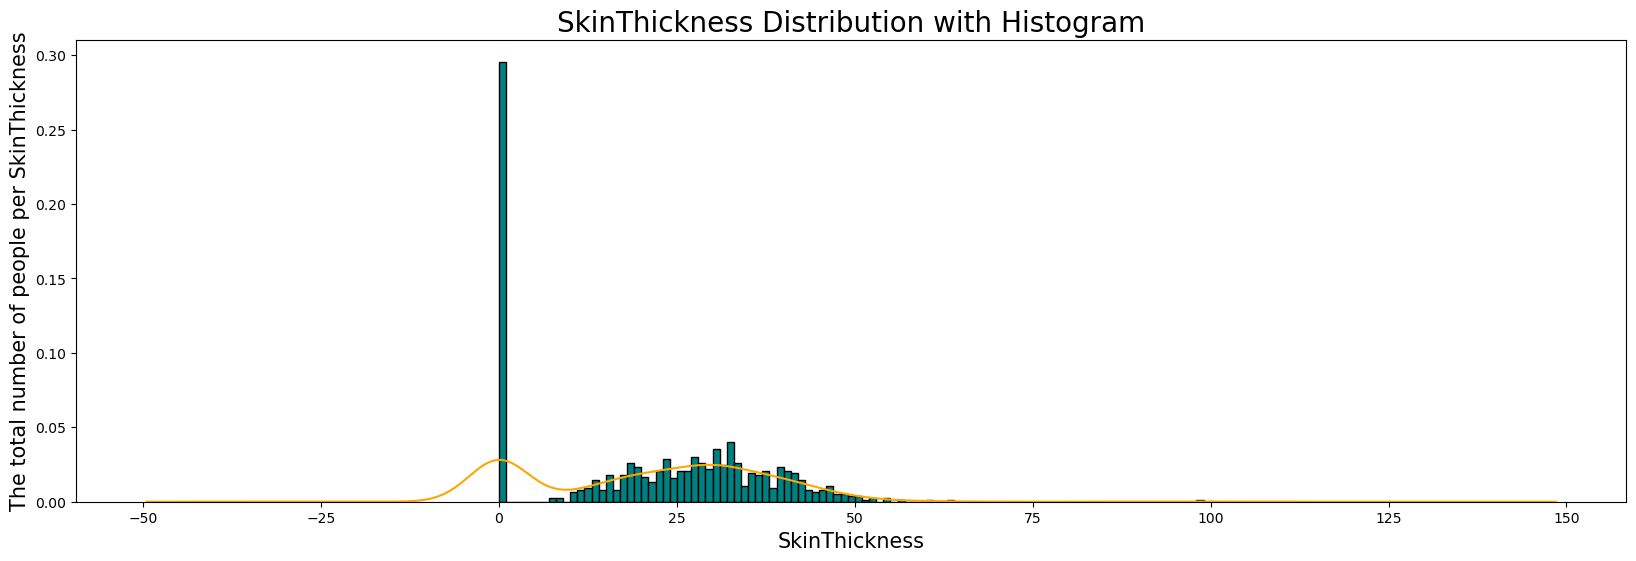

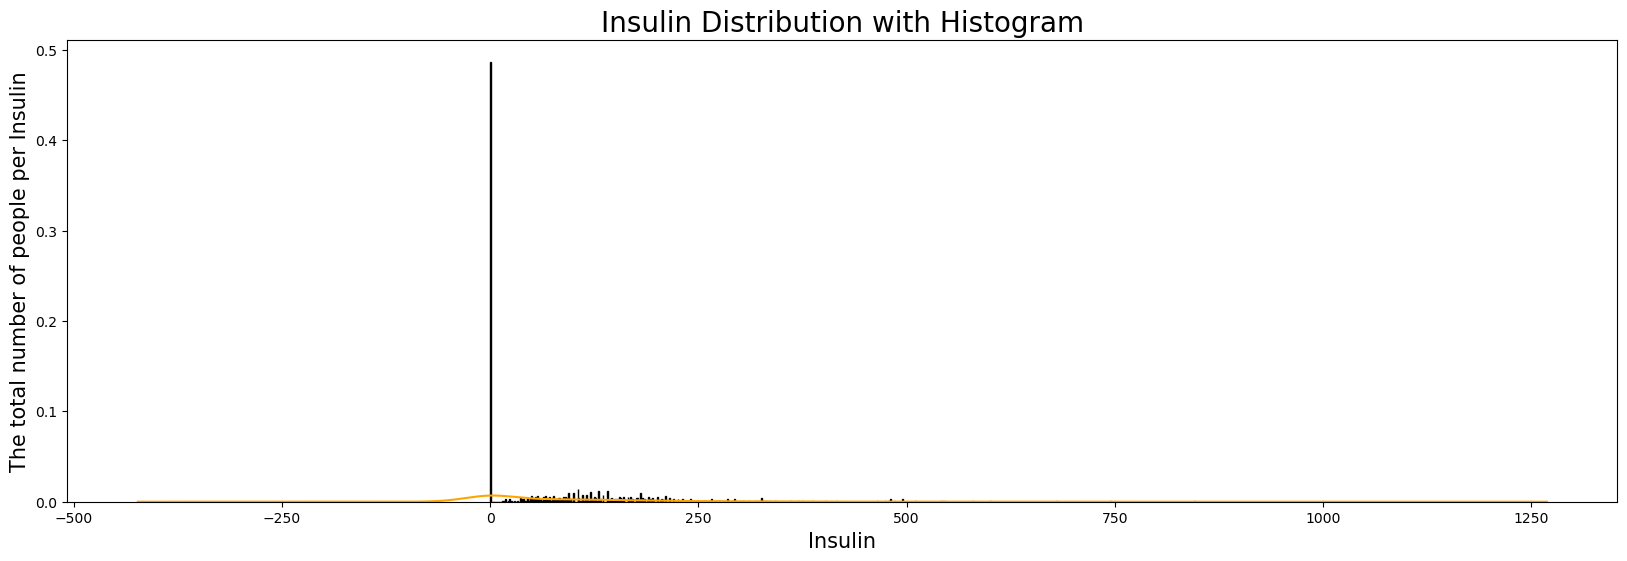

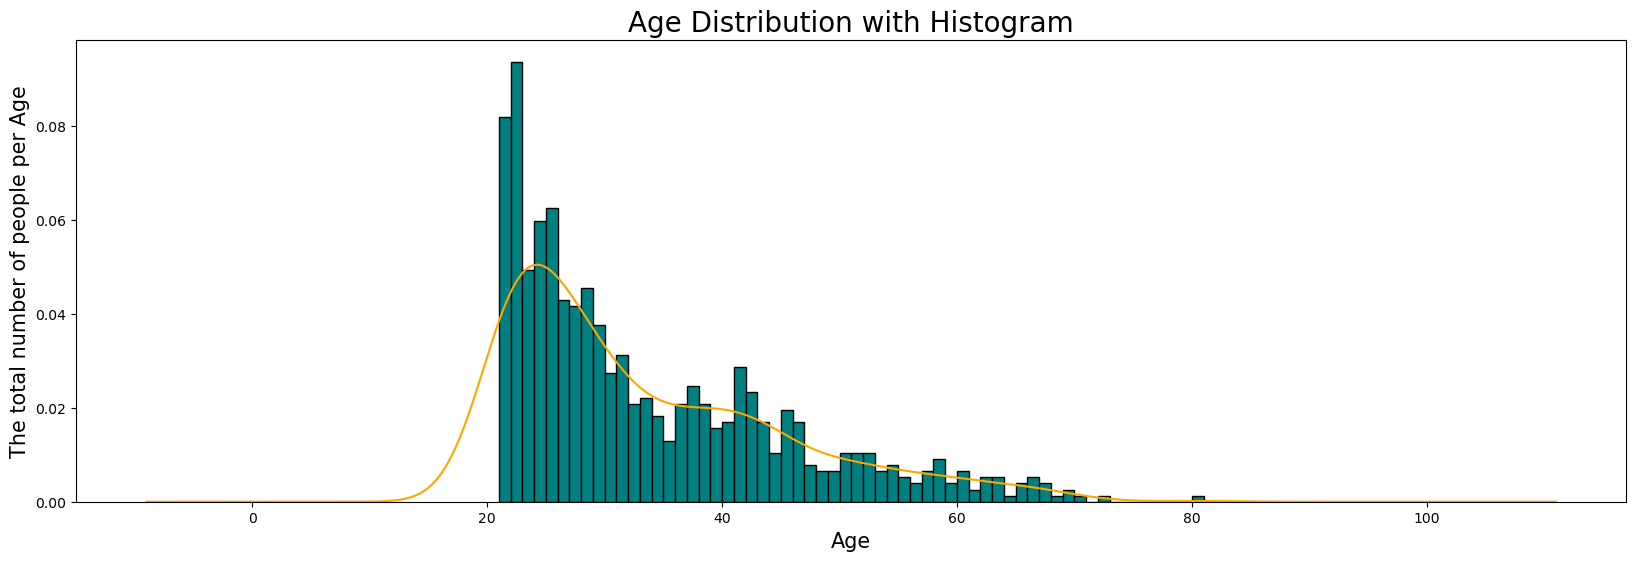

In [12]:
newdf = df.drop("Outcome", axis=1)
newdf = newdf.drop("BMI", axis=1)
newdf = newdf.drop("DiabetesPedigreeFunction", axis=1)

for col in newdf.columns:
    #Histplots
    fig, ax = plt.subplots(figsize=(20, 6))

    ax.hist(df[col], bins = max(df[col])-min(df[col]), edgecolor = 'black', color = 'teal', density = True)
    df[col].plot(kind = 'kde', color = 'orange')

    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel(f"The total number of people per {col}", fontsize=15)
    ax.set_title(f"{col} Distribution with Histogram", fontsize=20)
    
    plt.show()

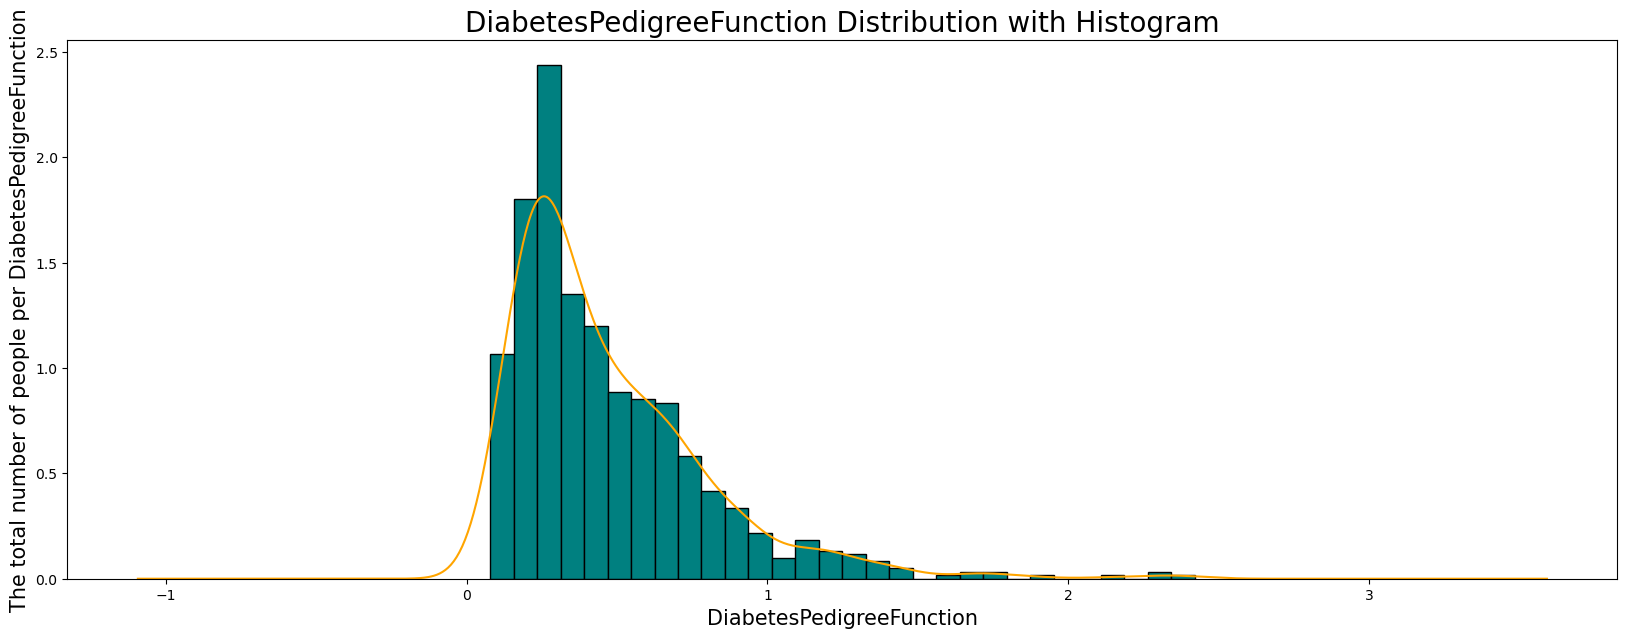

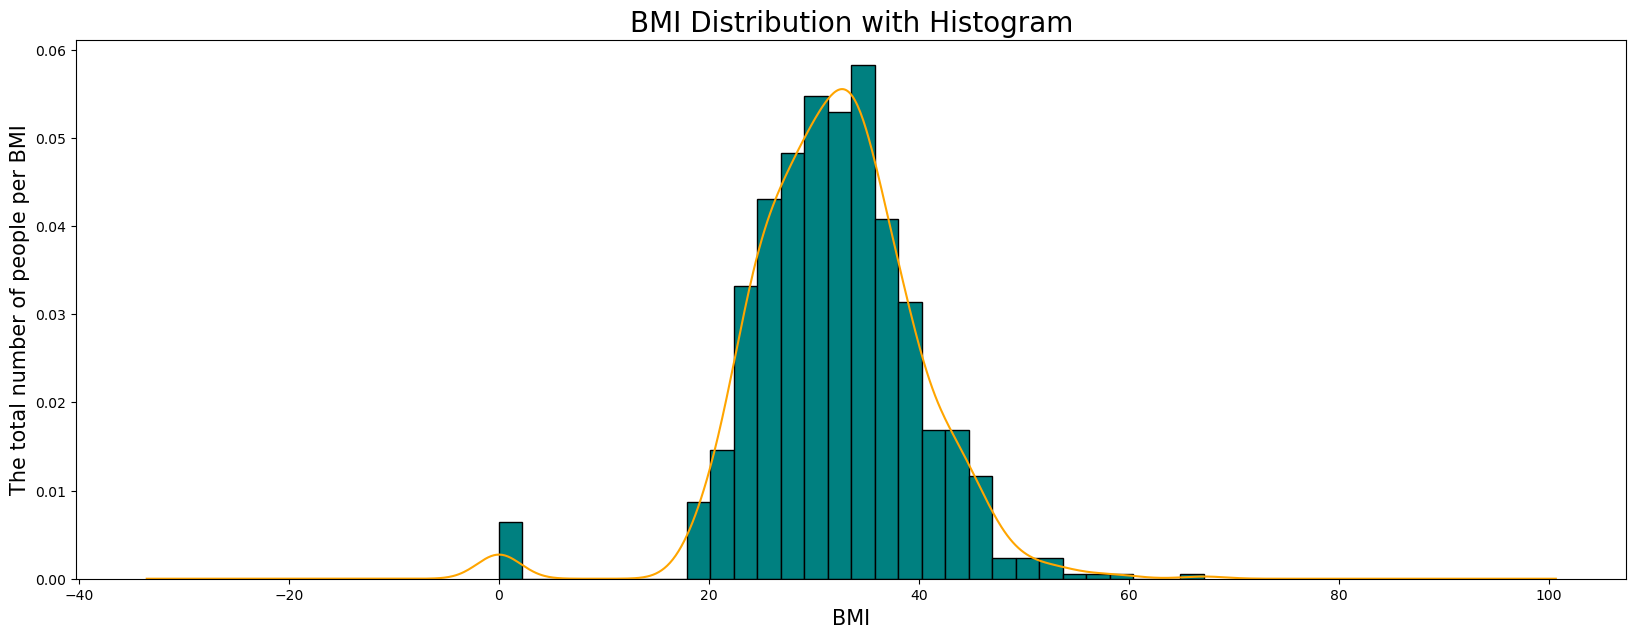

In [13]:
#Pregnancies -Histplot
for col in ("DiabetesPedigreeFunction", "BMI"):
    fig, ax = plt.subplots(figsize=(20, 7))

    ax.hist(df[col], bins = 30, edgecolor = 'black', color = 'teal', density = True)
    df[col].plot(kind = 'kde', color = 'orange')

    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel(f"The total number of people per {col}", fontsize=15)
    ax.set_title(f"{col} Distribution with Histogram", fontsize=20)
    plt.show()

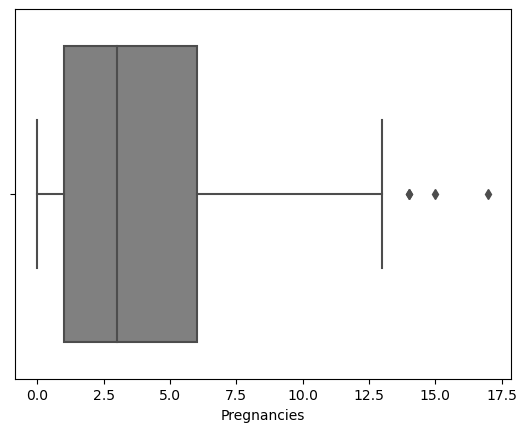

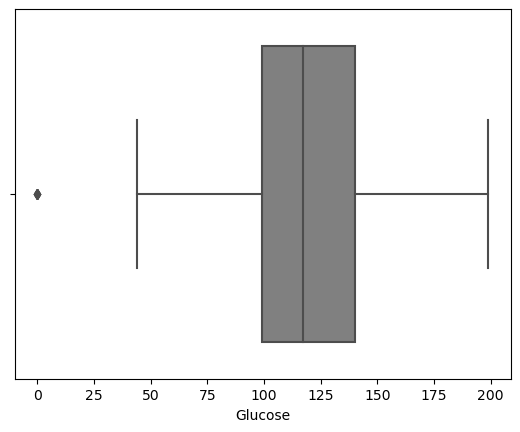

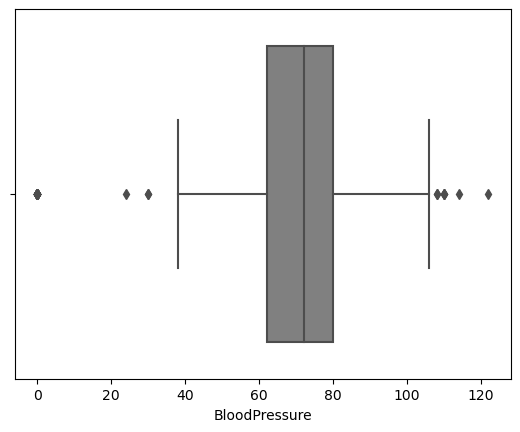

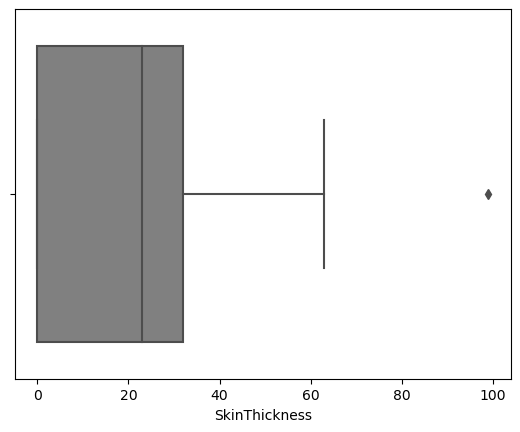

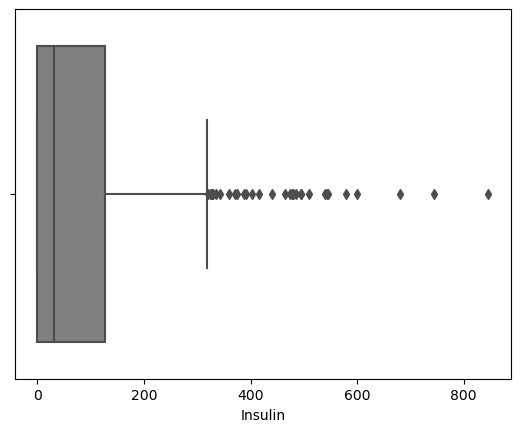

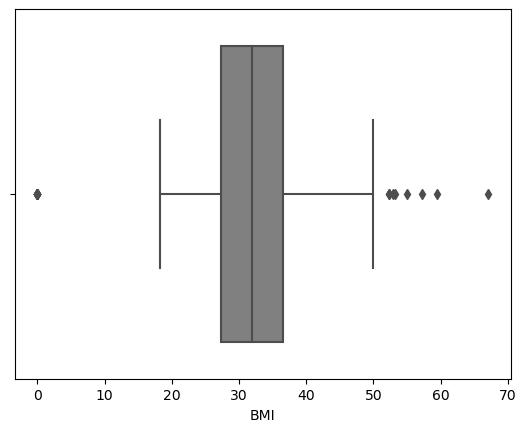

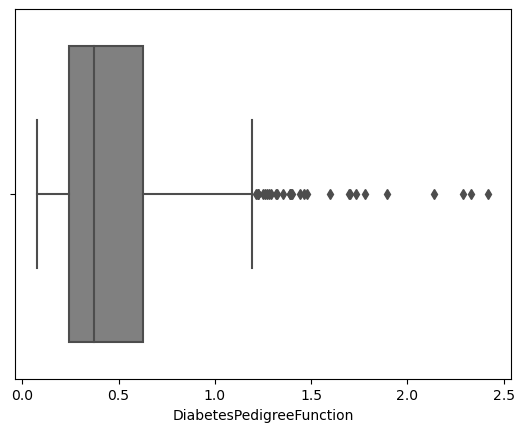

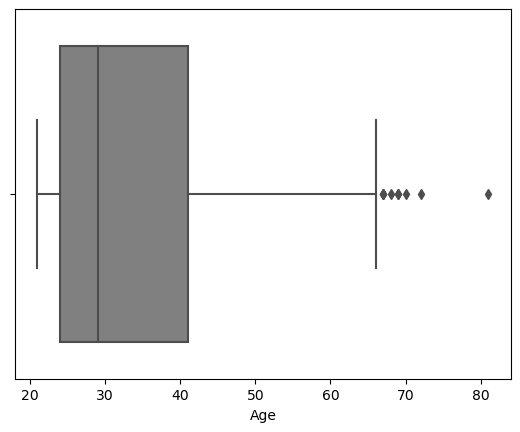

In [14]:
#boxplot for every column
newdf = df.drop("Outcome", axis=1)

for col in newdf.columns:
    plt.figure()
    sns.boxplot(data=newdf, x=col, color='grey')


In [15]:
print("It\'s important to note that the boxplot for Insulin and DiabetesPedigreeFunction reveals numerous outliers. However, as")
print("we will explore further in our pairplot analysis, these outliers alone may not provide conclusive insights into the")
print("relationship between individuals and diabetes.")

It's important to note that the boxplot for Insulin and DiabetesPedigreeFunction reveals numerous outliers. However, as
we will explore further in our pairplot analysis, these outliers alone may not provide conclusive insights into the
relationship between individuals and diabetes.


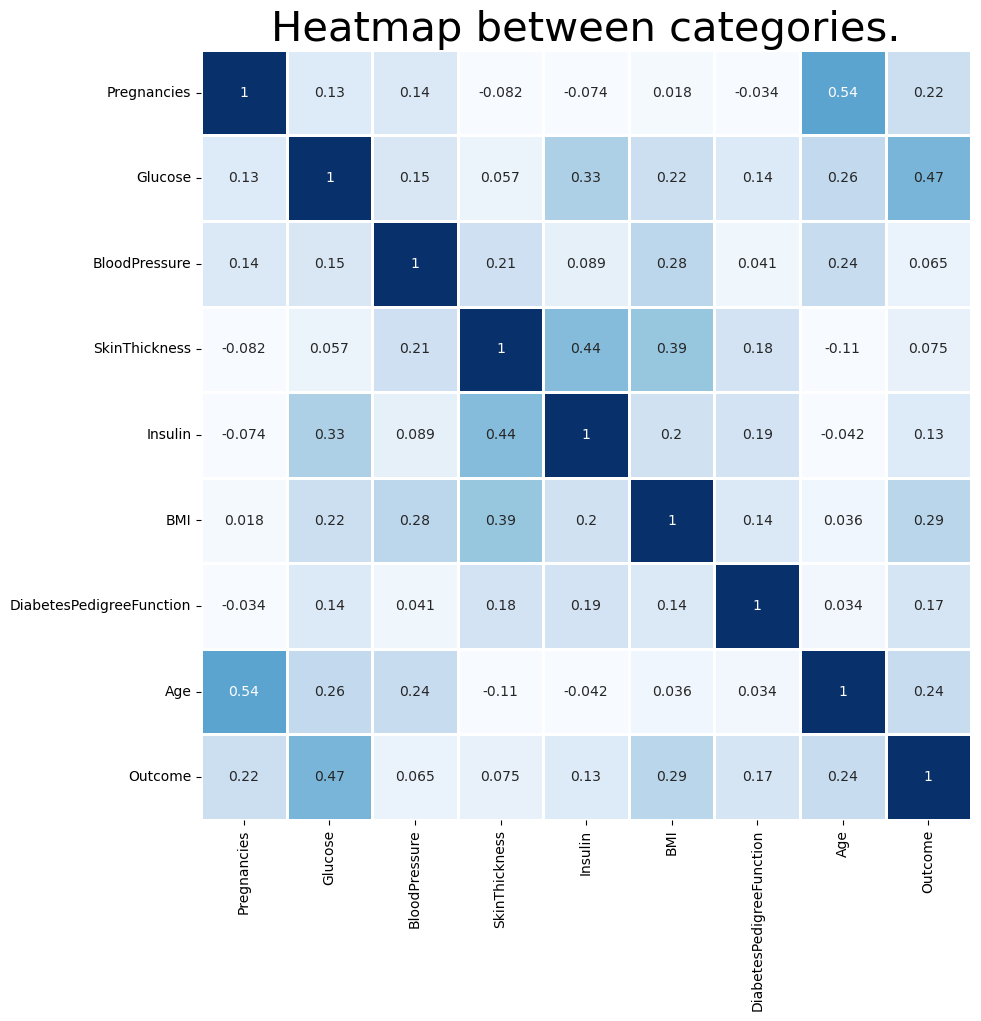

In [16]:
#correlaction of the dataset -heatmap 
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), cbar=0, linewidths=1,vmax=1, vmin=0, square=True, cmap= "Blues",annot=True, annot_kws={'size': 10})

plt.title('Heatmap between categories.', fontsize= 30)


plt.show()

In [17]:
print("We can see that pregnacies in our dataset increase as the age increase, and we also observe a similar relationship")
print("between glucose and outcome.")
print("In summary, the heatmap among categories provides an effective way to analyze categorical data and highlight ")
print("information that can enhance the performance of machine learning models.") 

We can see that pregnacies in our dataset increase as the age increase, and we also observe a similar relationship
between glucose and outcome.
In summary, the heatmap among categories provides an effective way to analyze categorical data and highlight 
information that can enhance the performance of machine learning models.


Text(0.5, 1.02, 'Pairplot with the categories of the dataset.')

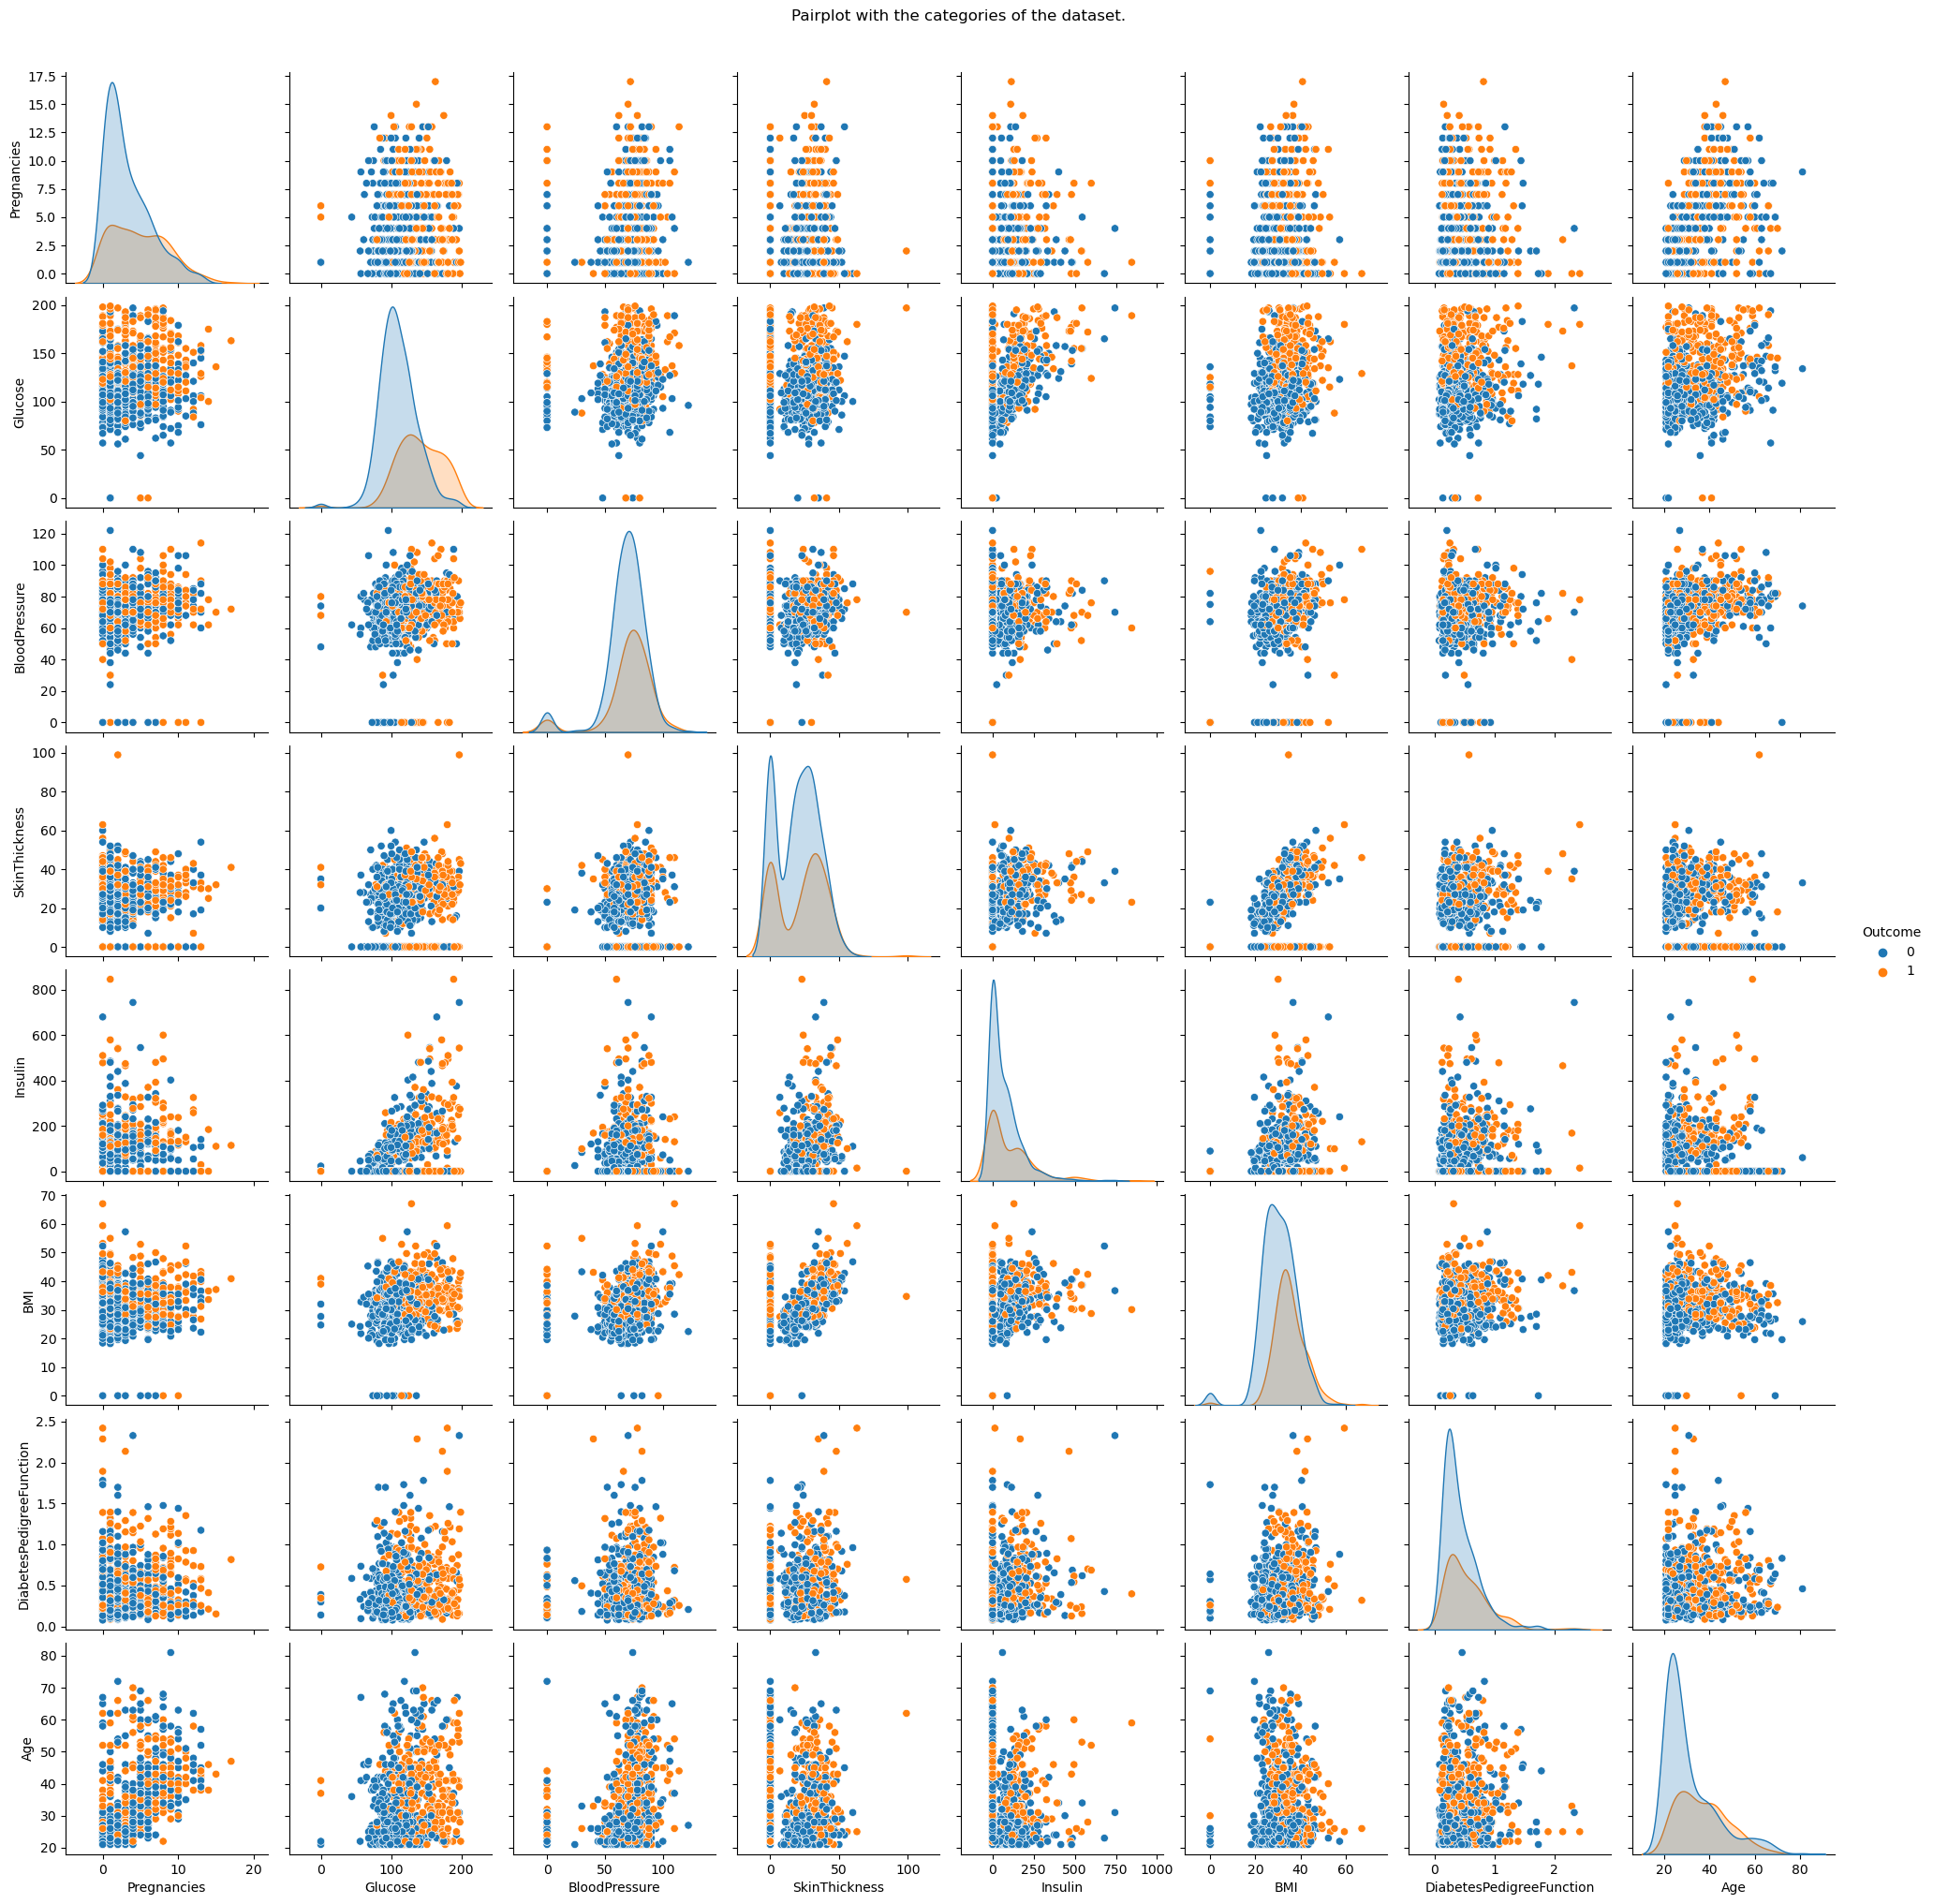

In [18]:
#pairplot with all columns from our dataset

ax= sns.pairplot(data=df,diag_kind='kde', hue="Outcome")

ax.fig.suptitle("Pairplot with the categories of the dataset.", y=1.02) 

In [19]:
#pairplot analysis 
print("It's particularly interesting to see the diagrams related to glucose, as they suggest that individuals in our dataset")
print("with 'high' glucose levels are more likely to test positive for diabetes.")
print("In a nutshell, a pairplot is a valuable tool for data exploration, helping you to quickly assess the relationships")
print("between variables and identify potential areas of interest for further analysis")

It's particularly interesting to see the diagrams related to glucose, as they suggest that individuals in our dataset
with 'high' glucose levels are more likely to test positive for diabetes.
In a nutshell, a pairplot is a valuable tool for data exploration, helping you to quickly assess the relationships
between variables and identify potential areas of interest for further analysis


##  Machine Learning models


In [20]:
#comment for models
print("We are faced with a medical diagnosis problem where the task is to classify medical records in order to aid in the")
print("diagnosis of diabetes. To accomplish this, we plan to employ a range of classification models, including Logistic")
print("Regression, k-Nearest Neighbors, Support Vector Machine (SVM), Kernel SVM, Naive Bayes, Decision Tree Classification,")
print("and Random Forest Classification.")

We are faced with a medical diagnosis problem where the task is to classify medical records in order to aid in the
diagnosis of diabetes. To accomplish this, we plan to employ a range of classification models, including Logistic
Regression, k-Nearest Neighbors, Support Vector Machine (SVM), Kernel SVM, Naive Bayes, Decision Tree Classification,
and Random Forest Classification.


In [21]:
#splitting the dataset into the Training and Test set, Training set will be the 80% of our dataset and Test set 20%
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [22]:
#feature scaling with standardization 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)
print(X_test)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]
[[-0.8354355   2.45735903  0.34674316 ...  1.35224513  2.78594417
  -0.96569189]
 [-0.54480808 -0.43719633  0.24436264 ...  0.17619533 -0.1876381
  -0.88240283]
 [ 0.03644676 -1.41253563 -0.36992051 ...  0.22677812 -0.22668514
  -0.71582471]
 ...
 [ 0.03644676  0.66399321  0.85864578 ...  1.4913478   0.53623395
  -0.96569189]
 [-0.25418066 -0.15403331  0.24436264 ... -0.74694053 -1.07971278
  -0.79911377]
 [-0.8354355  -0.43719633  0.14198211 ... -0.17788417  1.06487079
  -0.79911377]]


### 1st model: Logistic Regression model

In [23]:
#logistic regression model
classifier_log= LogisticRegression()
classifier_log.fit(X_train, y_train)

LogisticRegression()

In [24]:
#show how to make a simple prediction with the model
print(classifier_log.predict(sc.transform([[6,148,72, 35, 0 ,33.6, 0.627, 50]])))

[1]


In [25]:
#accuracy score on the training data
X_train_prediction = classifier_log.predict(X_train)
training_data_accuracy = confusion_matrix(X_train_prediction, y_train)
print("The accuracy of the model, in the same data, we have train it, is: ", accuracy_score(X_train_prediction, y_train))

The accuracy of the model, in the same data, we have train it, is:  0.762214983713355


In [26]:
#comment
print("We do that just to check, if we have overfitting or underfitting, we actually care about the accuracy, we're going to ")
print("have in our test set, because we build this model with this dataset and the result is most likely to \"fit\" them.")

We do that just to check, if we have overfitting or underfitting, we actually care about the accuracy, we're going to 
have in our test set, because we build this model with this dataset and the result is most likely to "fit" them.


In [27]:
#predicting the Test set results and make a matrix with predictions and real outcomes 
y_pred = classifier_log.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

In [28]:
#confusion Matrix part
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_log = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy_log)

[[98  9]
 [18 29]]
The accuracy of the model is:  0.8246753246753247


In [29]:
#mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 27


### 2nd model: k-Nearest Neighbors with 5 n_neighbors 

In [30]:
#k-nearest neighbors
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
#show how to make a simple prediction with the model
print(classifier_knn.predict(sc.transform([[6,148,72, 35, 0 ,33.6, 0.627, 50]])))

[1]


In [32]:
#predicting the Test set results and make a matrix with predictions and real outcomes 
y_pred = classifier_knn.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1);
print("Because, it's big to make matrix with predictions and real outcomes, I'm going to leave it, as a comment.")

Because, it's big to make matrix with predictions and real outcomes, I'm going to leave it, as a comment.


In [33]:
#confusion Matrix part
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_knn5 = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy_knn5)

[[93 14]
 [17 30]]
The accuracy of the model is:  0.7987012987012987


In [34]:
#mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 31


### 2nd model: k-Nearest Neighbors with 11 n_neighbors 

In [35]:
#k-nearest neighbors
classifier_knn11 = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier_knn11.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [36]:
#show how to make a simple prediction with the model
print(classifier_knn11.predict(sc.transform([[6,148,72, 35, 0 ,33.6, 0.627, 50]])))

[1]


In [37]:
#predicting the Test set results and make a matrix with predictions and real outcomes 
y_pred = classifier_knn11.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1);

In [38]:
#confusion Matrix part
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_knn11 = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy_knn11)

[[92 15]
 [20 27]]
The accuracy of the model is:  0.7727272727272727


In [39]:
#mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 35


In [40]:
#comment for n_neighbors
print("The optimal choice for the number of neighbors (n_neighbors) in a K-nearest neighbors (KNN) model depends on the dataset,")
print("and there is no one-size-fits-all solution. However, it's very common to consider a value close to the square root of the")
print("training data size divided by 2. In our case, if we calculate this, it falls between 12 and 13. Therefore, choosing 11 as")
print("our n_neighbors value was a reasonable decision, especially given the convention of using odd numbers in KNN models to")
print("avoid ties when voting for the nearest neighbors.")

The optimal choice for the number of neighbors (n_neighbors) in a K-nearest neighbors (KNN) model depends on the dataset,
and there is no one-size-fits-all solution. However, it's very common to consider a value close to the square root of the
training data size divided by 2. In our case, if we calculate this, it falls between 12 and 13. Therefore, choosing 11 as
our n_neighbors value was a reasonable decision, especially given the convention of using odd numbers in KNN models to
avoid ties when voting for the nearest neighbors.


In [41]:
#analysis previous knn models 
print("We see that the second one with n_neighbors as 11, has better accuracy than the first one with 5 n_neighbors, it's not")
print("a big difference, it's about 0.013, but when we are talking about percentage, we have a difference: 1.3%, which is very")
print("important, specially when we're using this model for important decisions.")

We see that the second one with n_neighbors as 11, has better accuracy than the first one with 5 n_neighbors, it's not
a big difference, it's about 0.013, but when we are talking about percentage, we have a difference: 1.3%, which is very
important, specially when we're using this model for important decisions.


### 3rd model: Support Vector Machine (SVM) 

In [42]:
#support vector machine (SVM) model
classifier_svm = svm.SVC()
classifier_svm.fit(X_train, y_train)

SVC()

In [43]:
#an example of prediction with the model
print(classifier_svm.predict(sc.transform([[6,148,72, 35, 0 ,33.6, 0.627, 50]])))

[1]


In [44]:
#predicting the Test set results and make a matrix with predictions and real outcomes 
y_pred = classifier_svm.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1);

In [45]:
#confusion Matrix part
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_svm = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy_svm)

[[96 11]
 [21 26]]
The accuracy of the model is:  0.7922077922077922


In [46]:
#mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 32


### 4th model: Linear Kernal SVM (2)

In [47]:
#support vector machine (SVM) model
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
#an example of prediction with the model
print(classifier_svm.predict(sc.transform([[6,148,72, 35, 0 ,33.6, 0.627, 50]])))

[1]


In [49]:
#predicting the Test set results and make a matrix with predictions and real outcomes 
y_pred = classifier_svm.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1);

In [50]:
#confusion Matrix part
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_linearkernel = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy_linearkernel)

[[98  9]
 [18 29]]
The accuracy of the model is:  0.8246753246753247


In [51]:
#mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 27


### 4rth model: RBF Kernel SVM

In [52]:
#kernel svm model
classifier_kernel = SVC(kernel = 'rbf')
classifier_kernel.fit(X_train, y_train)

SVC()

In [53]:
#an example of prediction with the model
print(classifier_kernel.predict(sc.transform([[6,148,72, 35, 0 ,33.6, 0.627, 50]])))

[1]


In [54]:
#predicting the Test set results and make a matrix with predictions and real outcomes 
y_pred = classifier_kernel.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1);

In [55]:
#confusion Matrix part
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_rbfkernel = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy_rbfkernel)

[[96 11]
 [21 26]]
The accuracy of the model is:  0.7922077922077922


In [56]:
#mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 32


### 5th model: Naive Bayes

In [57]:
#Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [58]:
#an example of prediction with the model
print(gnb.predict(sc.transform([[6,148,72, 35, 0 ,33.6, 0.627, 50]])))

[1]


In [59]:
#predicting the Test set results and make a matrix with predictions and real outcomes 
y_pred = gnb.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1);

In [60]:
#confusion Matrix part
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_naivebayes = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy_naivebayes)

[[93 14]
 [18 29]]
The accuracy of the model is:  0.7922077922077922


In [61]:
#mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 32


### 5th model: Decision Tree Classification

In [62]:
#decision tree classification
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [63]:
#an example of prediction with the model
print(gnb.predict(sc.transform([[6,148,72, 35, 0 ,33.6, 0.627, 50]])))

[1]


In [64]:
#predicting the Test set results and make a matrix with predictions and real outcomes 
y_pred = gnb.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1);

In [65]:
#confusion Matrix part
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_decisiontreeclassif = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy_decisiontreeclassif )

[[93 14]
 [18 29]]
The accuracy of the model is:  0.7922077922077922


In [66]:
#mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 32


### 6th model: Random Forest Classification 

In [67]:
#random forest classification
print("The parameter max_length is the number of splits that each decision tree is allowed to make. If the number of splits is")
print("too low, the model underfits the data and if it's too high the model overfits.")
print("Mostly, we are using the numbers: 3,5 and 7")    

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

The parameter max_length is the number of splits that each decision tree is allowed to make. If the number of splits is
too low, the model underfits the data and if it's too high the model overfits.
Mostly, we are using the numbers: 3,5 and 7


RandomForestClassifier(max_depth=5, random_state=0)

In [68]:
#an example of prediction with the model
print(clf.predict(sc.transform([[6,148,72, 35, 0 ,33.6, 0.627, 50]])))

[1]


In [69]:
#predicting the Test set results and make a matrix with predictions and real outcomes 
y_pred = clf.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1);

In [70]:
#confusion Matrix part
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_randomforestclassif = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy_randomforestclassif)

[[98  9]
 [19 28]]
The accuracy of the model is:  0.8181818181818182


In [71]:
#mislabeled points
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 28


In [72]:
#analysis part
print("In a nutshell, the accuracy of the models are :")
print("Logistic Regression: ", accuracy_log)
print("k-Nearest Neighbors with 5 n_neighbors: ", accuracy_knn5)
print("k-Nearest Neighbors with 11 n_neighbors: ", accuracy_knn11)
print("SVM: ", accuracy_svm)
print("Linear Kernel: ", accuracy_linearkernel)
print("RBF Kernal: ", accuracy_rbfkernel)
print("Naive Bayes: ", accuracy_naivebayes)
print("Decision Tree Classification: ", accuracy_decisiontreeclassif)  
print("Random Forest Classification: ", accuracy_randomforestclassif)

In a nutshell, the accuracy of the models are :
Logistic Regression:  0.8246753246753247
k-Nearest Neighbors with 5 n_neighbors:  0.7987012987012987
k-Nearest Neighbors with 11 n_neighbors:  0.7727272727272727
SVM:  0.7922077922077922
Linear Kernel:  0.8246753246753247
RBF Kernal:  0.7922077922077922
Naive Bayes:  0.7922077922077922
Decision Tree Classification:  0.7922077922077922
Random Forest Classification:  0.8181818181818182


In [75]:
#model selection part
print("As we can see, the best accuracy is 82.46% and comes from Logistic Regression model.")

As we can see, the best accuracy is 82.46% and comes from Logistic Regression model.


In [76]:
#analysis
print("As we can see our dataset is only 768 records, so it's not so \"accurate\" for a \"real\" data science project. We can")
print("observe some information, make analysis and machine learning models, but generally in the data science, we work with")
print("bigger datasets.")

As we can see our dataset is only 768 records, so it's not so "accurate" for a "real" data science project. We can
observe some information, make analysis and machine learning models, but generally in the data science, we work with
bigger datasets.
